# Visualizations 2 #
## A notebook of exploratory data analysis for energy forecasting ##

**Run Imports**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

**Seaborn plot formatting**

In [117]:
sns.set_context('paper', font_scale= 1.5) # size of text/graph elements
sns.despine() # takes away axes on charts with no grid
sns.set_style('darkgrid') # background of chart color and if grid is present

<Figure size 432x288 with 0 Axes>

**Reading in the data**

In [118]:
nrg = pd.read_csv('../data/all_erco_energy_cst.csv')

**Converting the date column to datetime type for indexing**

In [119]:
nrg['datetime'] = pd.to_datetime(nrg['datetime'].str[:-3],format='%Y%m%dT%H')

**Setting the date column as index**

In [120]:
nrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57865 entries, 0 to 57864
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           57865 non-null  datetime64[ns]
 1   demand             57660 non-null  float64       
 2   plant              57852 non-null  object        
 3   net_generation     57649 non-null  float64       
 4   coal               31513 non-null  float64       
 5   hydro              31513 non-null  float64       
 6   natural_gas        31513 non-null  float64       
 7   nuclear            31513 non-null  float64       
 8   other              31513 non-null  float64       
 9   solar              31513 non-null  float64       
 10  wind               31513 non-null  float64       
 11  total_interchange  57631 non-null  float64       
 12  forecast           57817 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 5.

**Dropping records that in the data for forcasting that don't have energy type info**

In [121]:
nrg.dropna(inplace=True)  # removes 26,000 records from before July 2018

**Making an hour column for plotting (0 to 23 hrs)**

In [122]:
nrg['hour_num'] = pd.to_numeric(nrg['datetime'].dt.strftime('%H'),downcast='integer')

In [123]:
# making a 'day_night' column, where 6am to 6pm is the day value; rest is night.
def calc_col_vals(row):
    if row['hour_num']<6 or row['hour_num']>17:
        return 'Night'
    elif row['hour_num']>5 and row['hour_num']<18:
        return 'Day'
    else:
        return 'WTF'

In [124]:
# applying day/night values to new column 'day_night'
nrg['day_night'] = nrg.apply(lambda row: calc_col_vals(row), axis=1)

In [125]:
# checking the value counts
nrg.apply(lambda row: calc_col_vals(row), axis=1).value_counts()

Night    15730
Day      15730
dtype: int64

In [126]:
# day of the week
nrg['weekday'] = nrg['datetime'].dt.strftime('%a')

In [127]:
# numbered day of week for chart order
nrg['weekday_num'] = pd.to_numeric(nrg['datetime'].dt.strftime('%w'))

In [128]:
# an am/pm column, but not sure this is useful
#msnrg['am_pm'] = msnrg['datetime'].dt.strftime('%p')

In [129]:
nrg['month'] = nrg['datetime'].dt.strftime('%b')

In [130]:
nrg['month_num'] = nrg['datetime'].dt.strftime('%m')

In [131]:
nrg['month_num'] = pd.to_numeric(nrg['month_num'])

In [132]:
nrg.isnull().sum()

datetime             0
demand               0
plant                0
net_generation       0
coal                 0
hydro                0
natural_gas          0
nuclear              0
other                0
solar                0
wind                 0
total_interchange    0
forecast             0
hour_num             0
day_night            0
weekday              0
weekday_num          0
month                0
month_num            0
dtype: int64

In [133]:
nrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31460 entries, 11 to 31523
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           31460 non-null  datetime64[ns]
 1   demand             31460 non-null  float64       
 2   plant              31460 non-null  object        
 3   net_generation     31460 non-null  float64       
 4   coal               31460 non-null  float64       
 5   hydro              31460 non-null  float64       
 6   natural_gas        31460 non-null  float64       
 7   nuclear            31460 non-null  float64       
 8   other              31460 non-null  float64       
 9   solar              31460 non-null  float64       
 10  wind               31460 non-null  float64       
 11  total_interchange  31460 non-null  float64       
 12  forecast           31460 non-null  float64       
 13  hour_num           31460 non-null  int8          
 14  day_n

In [134]:
# Melting Energy Sources into a single column for seaborn viz
melt_nrg = pd.melt(nrg, 
        id_vars= ['datetime', 'month','month_num','weekday','weekday_num',
                 'day_night', 'hour_num'],
        value_vars=['net_generation','coal',
                    'hydro','natural_gas','nuclear', 'other',
                    'solar','wind'], 
        var_name='energy_type',
        value_name='energy_mwh')

In [135]:
melt_nrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251680 entries, 0 to 251679
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     251680 non-null  datetime64[ns]
 1   month        251680 non-null  object        
 2   month_num    251680 non-null  int64         
 3   weekday      251680 non-null  object        
 4   weekday_num  251680 non-null  int64         
 5   day_night    251680 non-null  object        
 6   hour_num     251680 non-null  int8          
 7   energy_type  251680 non-null  object        
 8   energy_mwh   251680 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), int8(1), object(4)
memory usage: 15.6+ MB


In [136]:
melt_nrg.set_index('datetime')

,month,month_num,weekday,weekday_num,day_night,hour_num,energy_type,energy_mwh
datetime,,,,,,,,
2022-02-06 00:00:00,Feb,2,Sun,0,Night,0,net_generation,51687.0
2022-02-05 23:00:00,Feb,2,Sat,6,Night,23,net_generation,52179.0
2022-02-05 22:00:00,Feb,2,Sat,6,Night,22,net_generation,52350.0
2022-02-05 21:00:00,Feb,2,Sat,6,Night,21,net_generation,51572.0
2022-02-05 20:00:00,Feb,2,Sat,6,Night,20,net_generation,50199.0
...,...,...,...,...,...,...,...,...
2018-07-03 05:00:00,Jul,7,Tue,2,Night,5,wind,4550.0
2018-07-03 04:00:00,Jul,7,Tue,2,Night,4,wind,4465.0
2018-07-03 03:00:00,Jul,7,Tue,2,Night,3,wind,4671.0


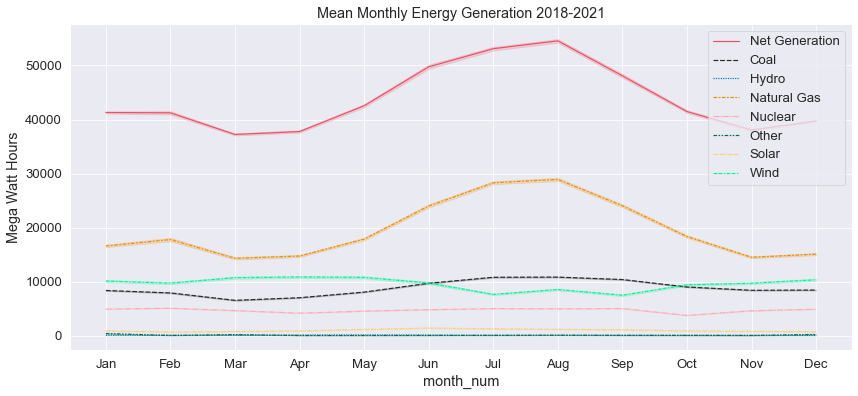

In [61]:
#['net_generation','coal', 'hydro','natural_gas','nuclear', 'other', 'solar','wind']
#colors={'demand':'#007EB5', 'net_generation':'#EC5064', 'coal':'#F9A834','hydro':'#B4CF68', 'natural gas':'#EF8D00', 'oil':'#FFD083',  'nuclear':'#007043', 'other':'#00F995', 'solar':'#00D982', 'wind':'#00965A', 'total_interchange': '#2A2A2A', 'forecast': '#84#1F9'}
colors=['#EC5064','#2A2A2A','#007EB5', '#EF8D00','#FFAAB0','#007043','#FFD083', '#00F995']
customPallete = sns.set_palette(sns.color_palette(colors))

figtitle = "Mean Monthly Energy Generation 2018-2021" 
plt.figure(figsize=(14,6))
sns.lineplot(x='month_num', y='energy_mwh', hue='energy_type', style='energy_type',
            data=melt_nrg, legend='brief'); 
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], 
            labels=['Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec']); #use ticks to get months
plt.legend(labels=['Net Generation', 'Coal', 'Hydro', 'Natural Gas', 'Nuclear', 'Other', 'Solar', 'Wind'])
plt.ylabel("Mega Watt Hours")
plt.title(figtitle)
plt.savefig('../output/' + figtitle + '.png', dpi=300) 

In [28]:
#nrg = nrg.set_index('datetime');

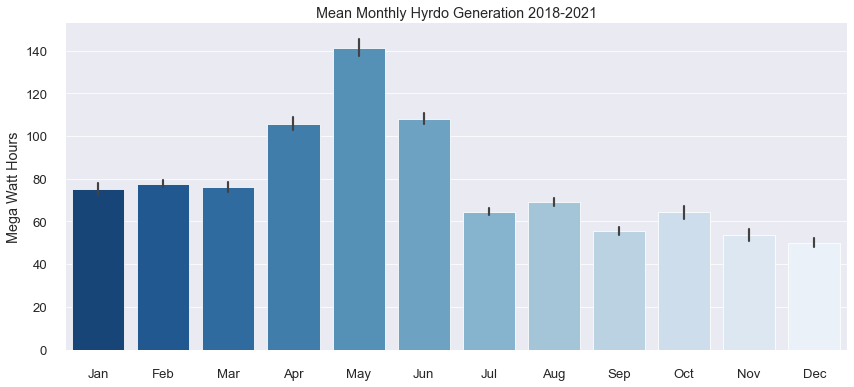

In [62]:
plt.figure(figsize=(14,6));
figtitle = 'Mean Monthly Hyrdo Generation 2018-2021'
# Draw a nested boxplot to show bills by day and time
sns.barplot(x="month", y="hydro",
            data=nrg.sort_values(by='month_num'), palette='Blues_r')
sns.despine(offset=10, trim=True)

plt.ylabel("Mega Watt Hours")
plt.xlabel('')
plt.title(figtitle)
plt.savefig('../output/' + figtitle + '.png', dpi=300)

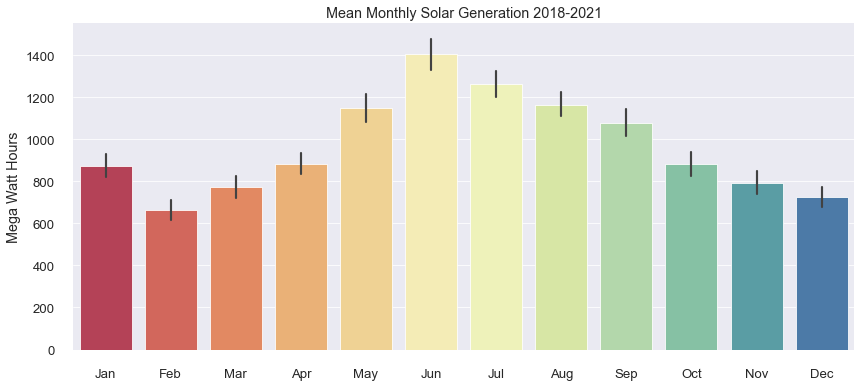

In [63]:
plt.figure(figsize=(14,6));
figtitle = "Mean Monthly Solar Generation 2018-2021"
# Draw a nested boxplot to show bills by day and time
sns.barplot(x="month", y="solar",
            data=nrg.sort_values(by='month_num'), palette='Spectral')
sns.despine(offset=10, trim=True)

plt.ylabel("Mega Watt Hours")
plt.xlabel('')
plt.title(figtitle)
plt.savefig('../output/' + figtitle + '.png', dpi=300)

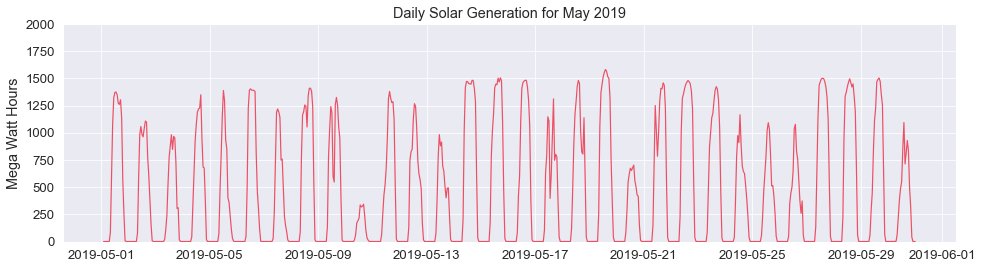

In [65]:
df = nrg[(nrg['datetime'] > '2019-05-01 01:00:00') & (nrg['datetime'] < '2019-05-31 01:00:00')].set_index('datetime')

figtitle = "Daily Solar Generation for May 2019"
plt.figure(figsize=(16,4))
sns.lineplot(x='datetime', y='solar', data= df)

plt.ylim(bottom=0, top=2000)
plt.title(figtitle)
plt.xlabel('')
plt.ylabel("Mega Watt Hours")
plt.savefig('../output/' + figtitle + '.png', dpi=300)

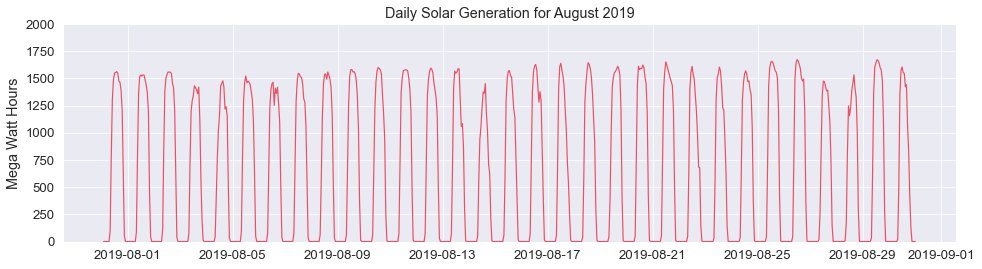

In [67]:
df = nrg[(nrg['datetime'] > '2019-07-31 01:00:00') & (nrg['datetime'] < '2019-08-31 01:00:00')]

figtitle = "Daily Solar Generation for August 2019"
plt.figure(figsize=(16,4))
sns.lineplot(x='datetime', y='solar', data= df)
plt.ylim(bottom=0, top=2000)
plt.title(figtitle)
plt.xlabel('')
plt.ylabel("Mega Watt Hours")
plt.savefig('../output/' + figtitle + '.png', dpi=300)

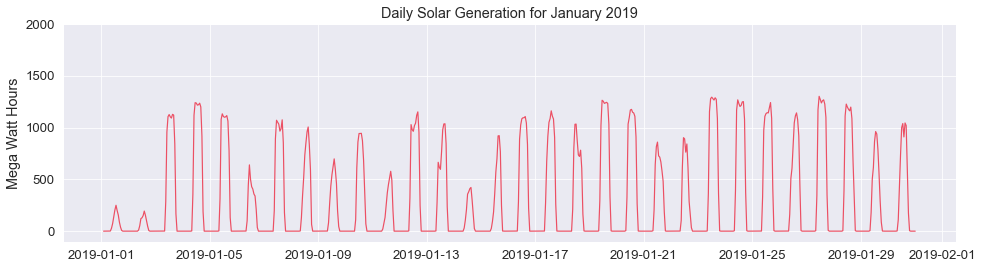

In [69]:
df = nrg[(nrg['datetime'] > '2019-01-01 01:00:00') & (nrg['datetime'] < '2019-01-31 01:00:00')]

figtitle = "Daily Solar Generation for January 2019"
plt.figure(figsize=(16,4))
sns.lineplot(x='datetime', y='solar', data= df)
plt.ylim(bottom=-100, top=2000)
plt.title(figtitle)
plt.xlabel('')
plt.ylabel("Mega Watt Hours")
plt.savefig('../output/' + figtitle + '.png', dpi=300)

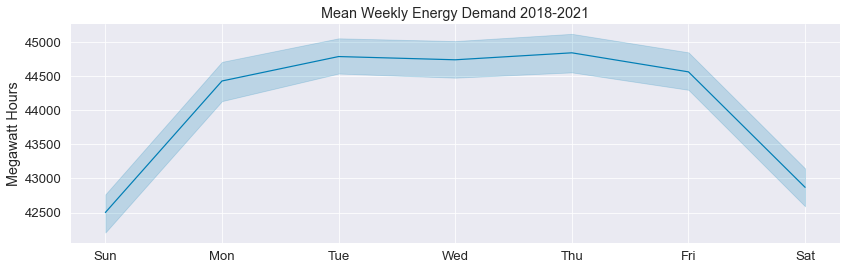

In [71]:
#plt.figure(figsize=(9,6));
figtitle = "Mean Weekly Energy Demand 2018-2021"
sns.relplot(x="weekday", y='demand',kind="line", color='#007EB5',
            data= nrg.sort_values(by='weekday_num'), height= 4, 
            aspect=3).set(title= figtitle, xlabel='', ylabel='Megawatt Hours');
plt.savefig('../output/' + figtitle + '.png', dpi=300) 

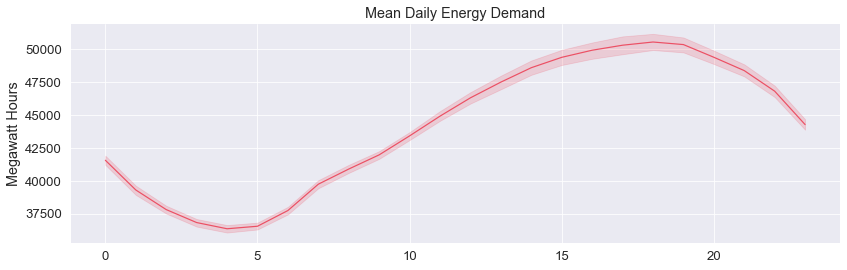

In [73]:
figtitle = "Mean Daily Energy Demand"
#plt.figure(figsize=(9,6));
sns.relplot(x="hour_num", y='demand',kind="line",
                data=nrg, height=4, aspect=3).set(xlabel='',ylabel='Megawatt Hours', title=figtitle);
plt.savefig('../output/' + figtitle + '.png', dpi=300) 

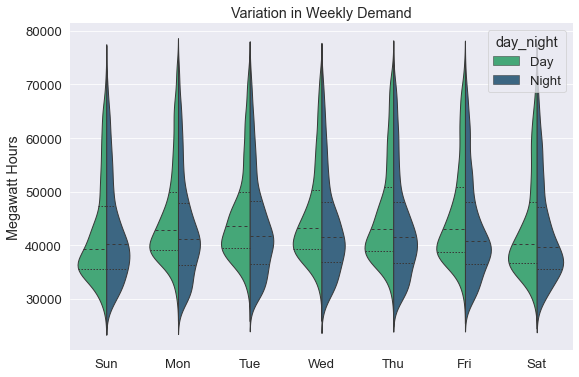

In [92]:
plt.figure(figsize=(9,6));
figtitle = "Variation in Weekly Demand"
sns.violinplot(data=nrg, order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], 
               x="weekday", y="demand", hue="day_night", hue_order=['Day','Night'],
               split=True, inner="quart", linewidth=1,
               palette='viridis_r').set(title=figtitle, xlabel='', ylabel='Megawatt Hours')

sns.despine(left=True)
plt.savefig('../output/' + figtitle + '.png', dpi=300) 

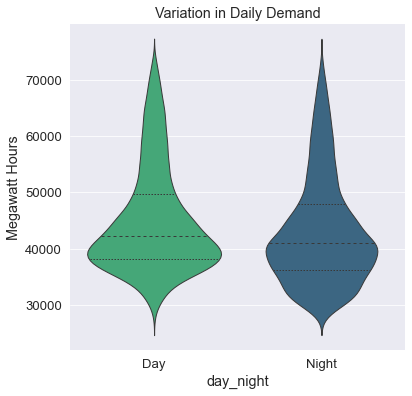

In [93]:
plt.figure(figsize=(6,6));
figtitle = "Variation in Daily Demand"
sns.violinplot(data=nrg, 
               x="day_night", y="demand", order=['Day','Night'],
               split=False, inner="quart", linewidth=1,
               palette='viridis_r').set(title=figtitle,ylabel='Megawatt Hours')  
sns.despine(left=True)
plt.savefig('../output/' + figtitle + '.png', dpi=300) #6am to 6pm and 6pm to 6pm